In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
ad_data = pd.read_csv('advertising.csv')
ad_data.info()
ad_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

(array([ 50., 118., 195., 159., 153., 138.,  77.,  65.,  28.,  17.]),
 array([19. , 23.2, 27.4, 31.6, 35.8, 40. , 44.2, 48.4, 52.6, 56.8, 61. ]),
 <a list of 10 Patch objects>)

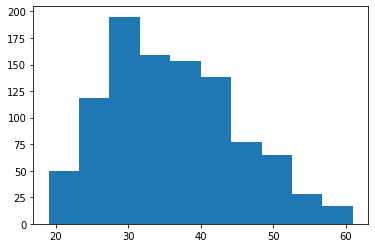

In [6]:
plt.hist(ad_data.Age)

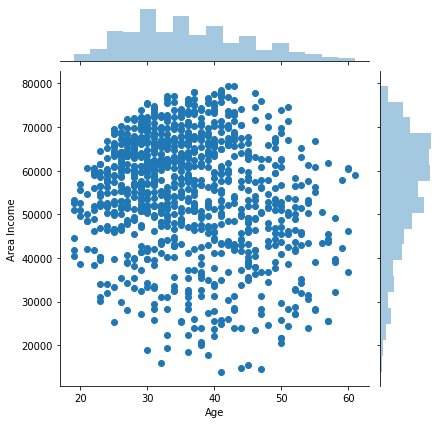

In [9]:
sns.jointplot(y='Area Income', x='Age',data=ad_data)

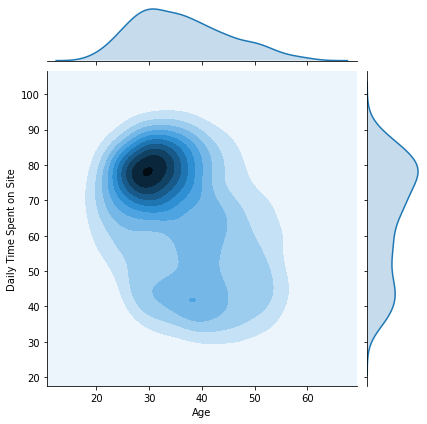

In [11]:
sns.jointplot(y='Daily Time Spent on Site', x='Age',data=ad_data, kind='kde')


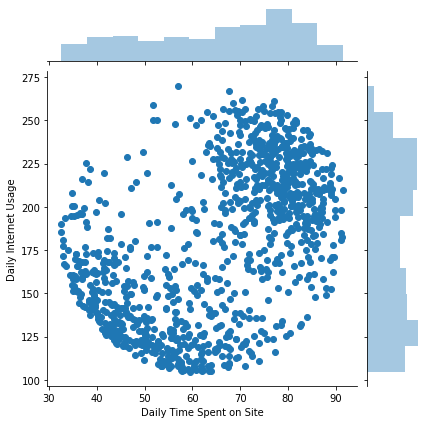

In [12]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data)

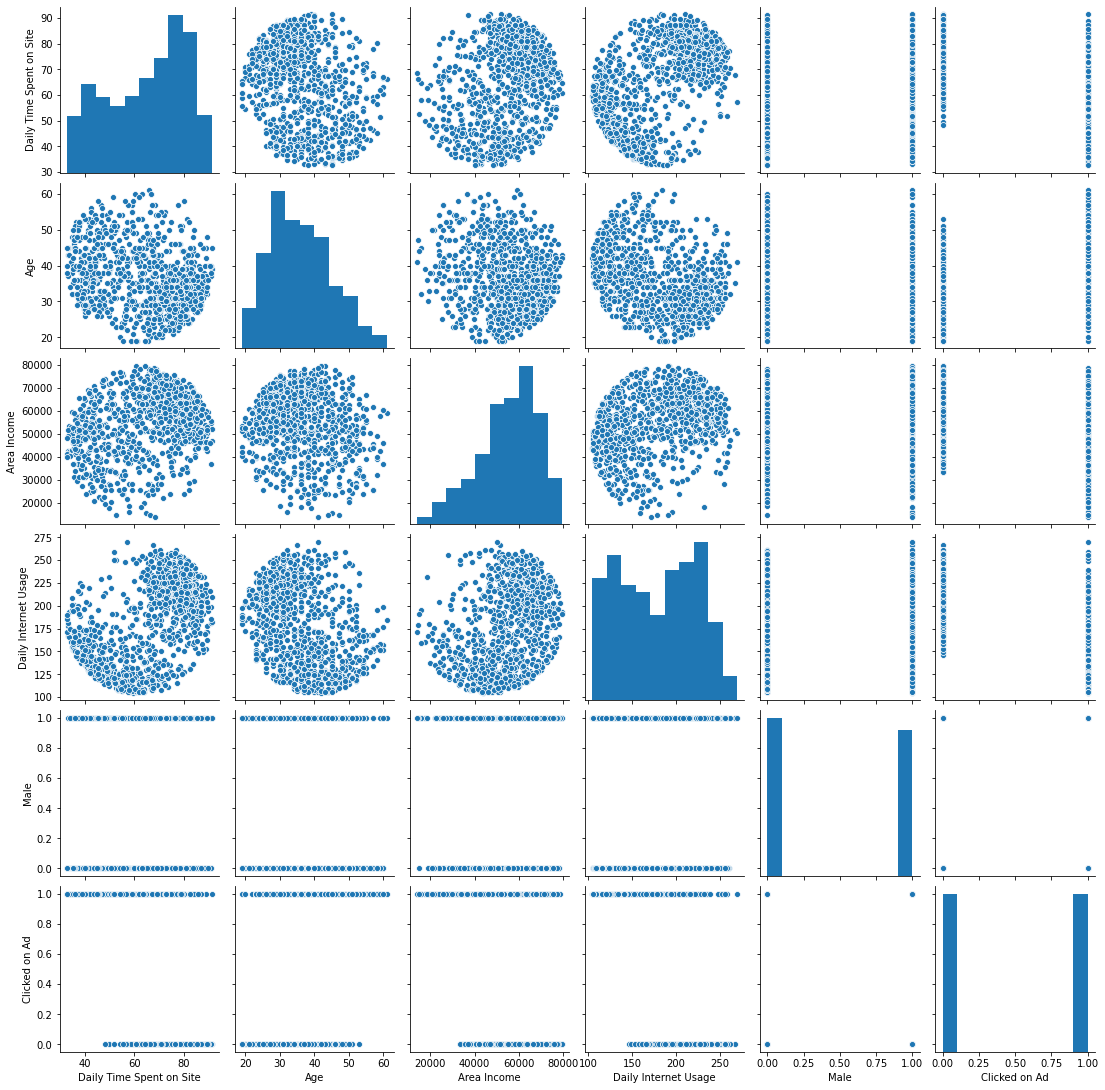

In [13]:
sns.pairplot(ad_data)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = ad_data.iloc[:, 0:3]
y = ad_data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False).fit(X_train, y_train)
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [24]:
from sklearn.metrics import classification_report
y_prediction = lr.predict(X_test)
print(classification_report(y_test, y_prediction))

precision    recall  f1-score   support

           0       0.90      0.94      0.92       157
           1       0.93      0.88      0.91       143

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

